# Multi-index and reassessing the approach to indexing...
The notebook gets into multi-index, and also re-asseses the approach used for indexing.

The impetus is:
* basic indexing techniques do not work with multi-index - so don't use them for basic stuff
* a "view" on a dataframe does not allow modifying the dataframe.  For example the awesome binary selection using "criterion" reults in a view - but you cannot then change the data !!!

## Groupby, split-apply-combine
Reference:
* https://www.datacamp.com/tutorial/pandas-split-apply-combine-groupby

Other stuff (later...)
* https://www.datacamp.com/tutorial/pandas-multi-index
* https://www.datacamp.com/courses/data-manipulation-with-pandas


In [1]:
# Import packages and set visualization style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [7]:
# Import data and check out head of DataFrame
# data from https://data.world/chasewillden/netflix-shows
df = pd.read_csv('datasets/netflix.csv')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


# .info(), pairplot, describe(), head()
* nulls count

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [9]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


# Drop rows with missing values and drop duplicate
* df.dropna(inplace=True)
* df.drop_duplicates(inplace=True)

# Visualize pairplot of df
* sns.pairplot(df, hue='rating');

In [10]:
# Drop rows with missing values and drop duplicate
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

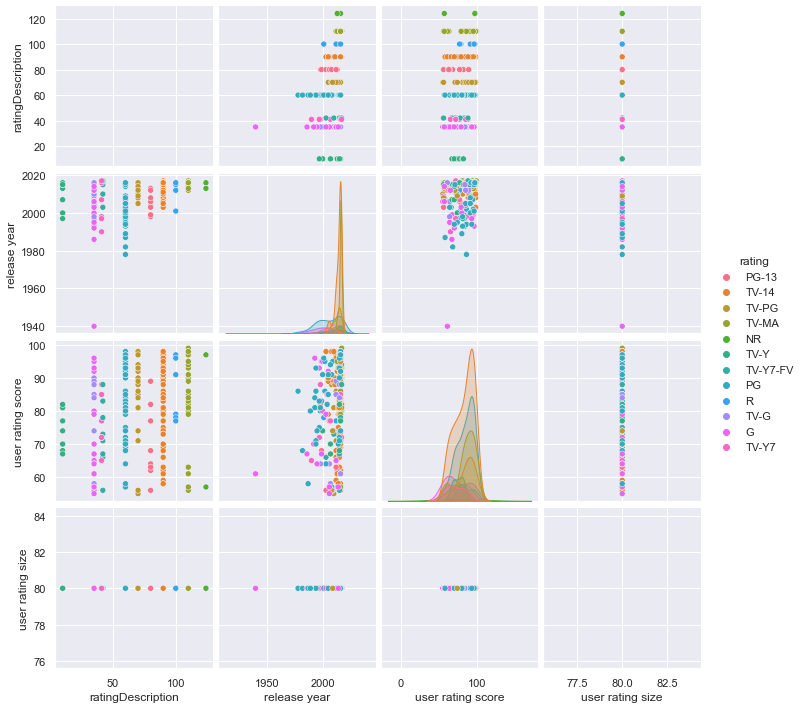

In [14]:
# Visualize pairplot of df
sns.pairplot(df, hue='rating');